In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [6]:
cols=['Age','Annual Income (k$)','Spending Score (1-100)']
path='./Mall_Customers.csv'

df=pd.read_csv(path,header=0,usecols=cols)

df.columns=['Age','income','score']
data=df.values
df.head()

,Age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


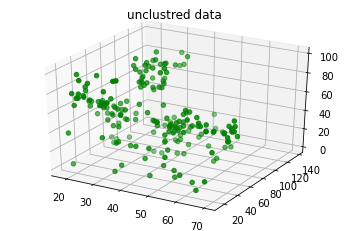

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(data[:,0],data[:,1],data[:,2],color='g')
plt.title("unclustred data")
plt.show()

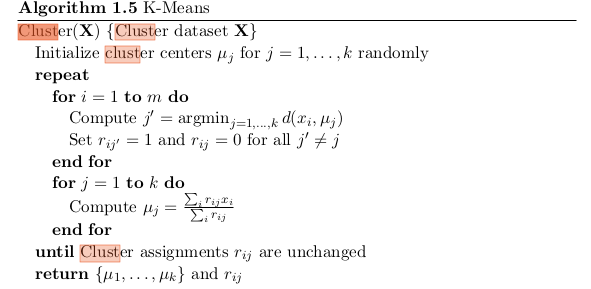

In [42]:
# ecludian distance between point and center
def distance(p1,p2):
    '''p1: center  p2: point '''
    
    l=[(i-j)**2 for i,j in zip(p1,p2)]
    return np.sum(l)**.5 

# stoping criteria if prevous and current centroid are approx same
def stop(cent2,cent1):
    '''
    Args:
    cent2: previous centroid
    cent1: current centroid
    
    Returns: True if both centers are approx equal False
    
    '''
    x=[]
    for i in range(len(cent2)):
        x1=np.around(np.array(cent1[i]),3)
        x2=np.around(np.array(cent2[i]),3)
        x.extend(x2-x1)  
    y=[i==0.0 for i in x]
    return all(y)
 
# kmean clustering algorithm
def clustering(data,c_size):
    '''
    Args:
    data: input_data
    c_size: numbers of cluster
    
    Returns:
    centroid: centroid of cluster
    Cluster: data points grouped in diffrent cluster
    
    '''
    Cluster=None
    idx=np.random.randint(0,data.shape[0],size=c_size)
    centroid=data[idx,:].tolist()
    centroid2=centroid+1
    while(!stop(centroid2,centroid)):
        centroid2=centroid
        C= [[] for i in range(c_size)]
        for i in range(data.shape[0]):
            d_set=[distance(data[i,:],k) for k in centroid]
            c_idx=d_set.index(np.min(d_set))
            C[c_idx].append(data[i,:].tolist()) 
        centroid=[np.average(i,axis=0).tolist() for i in C]
        Cluster=C
        t-=1
    return centroid,Cluster  


# run clustering algoritm 6 times
centre,clstr=[],[]
for i in range(6):
    cnt,cl=clustering(data,3)
    centre.append(cnt)
    clstr.append(cl)


Cost Function of Kmean Clustering Which should be minimised

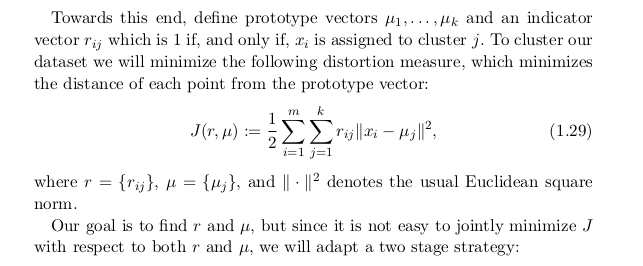


In [43]:
# to get best cluster which has minimum cost
def find_min(centroid,cluster):
    '''
    Args:
    centroid: centroid of cluster
    Cluster: data points grouped in diffrent cluster
    
    Returns:
    centroid[idx]: best centroid with minimum cost
    cluster[idx]:  cluster correspinding to best centroid
    
    '''
    cost_f=[]
    for i,j in zip(centroid,cluster):
        g=0
        for centr,clstr in zip(i,j):
            for k in clstr:
                g=g+distance(k,centr)
        cost_f.append(g)    
    idx=cost_f.index(min(cost_f))
    return centroid[idx],cluster[idx]
centroid,cl_point=find_min(centre,clstr)

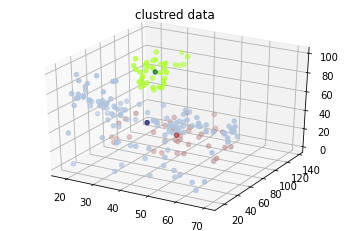

In [44]:
x,y,z=[],[],[]
color=[]
for idx,i in  enumerate(cl_point):
    for j in i:
        l,m,n=j
        x.append(l)
        y.append(m)
        z.append(n)
        color.append(idx)

size=color[len(color)-1]
for idx,i in enumerate(centroid):
    l,m,n=i
    x.append(l)
    y.append(m)
    z.append(n)
    color.append(idx+size+1)
   
col=['greenyellow','rosybrown','lightsteelblue','darkgreen','darkred','midnightblue']   
colors=[col[i] for i in color]
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection="3d")
ax2.scatter(x,y,z,color=colors)
plt.title("clustred data")
plt.show()